Predicting Price of House using KNearestNeighbour Regressor
----------------------------------------------------------------------------------------
Use KNearestNeighbourRegressor to Predict Price of House.

Here is the dataset https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt
- Use pandas to get some insights into the data (10 marks)
- Show some interesting visualization of the data (10 marks)
- Manage data for training & testing (20)
- Finding a better value of k (10)

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#print("hello")

In [2]:
rent_df= pd.read_csv('E:/Namit/Namit/Training/Edyoda/MachineLearning/Assignments/house_rental_data.csv')

In [3]:
rent_df.head(5)

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [4]:
rent_df.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [5]:
rent_df.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


<AxesSubplot:xlabel='Sqft', ylabel='Price'>

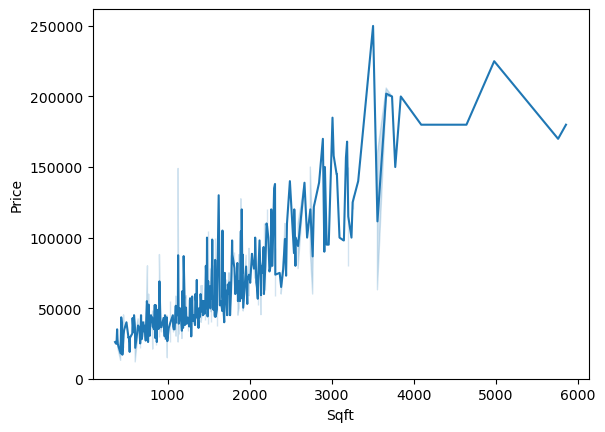

In [6]:
sns.lineplot(data = rent_df, x = 'Sqft', y = 'Price')

In [7]:
rent_df['price_per_sqft']=rent_df['Price']/rent_df['Sqft']

In [8]:
rent_df.head(5)

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,price_per_sqft
0,1,1177.698,2,7,2,2,2,62000,52.645075
1,2,2134.800,5,7,4,2,2,78000,36.537381
2,3,1138.560,5,7,2,2,1,58000,50.941540
3,4,1458.780,2,7,3,2,2,45000,30.847695
4,5,967.776,11,14,3,2,2,45000,46.498363


<AxesSubplot:xlabel='Sqft', ylabel='price_per_sqft'>

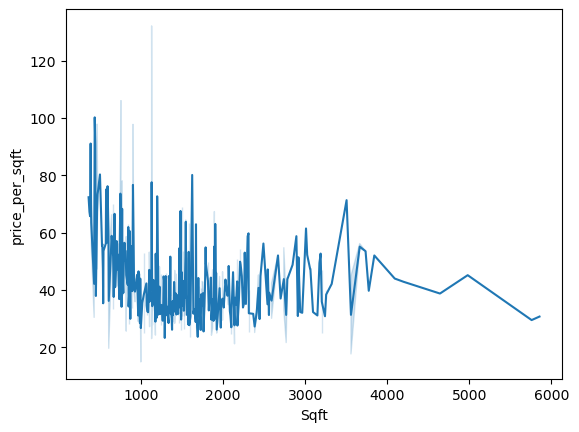

In [9]:
sns.lineplot(data = rent_df, x = 'Sqft', y = 'price_per_sqft')

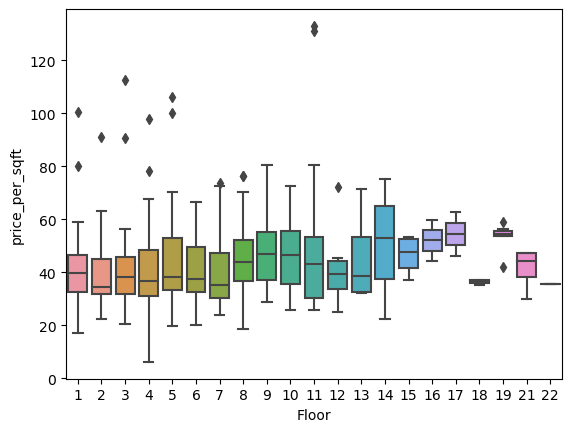

In [10]:
sns.boxplot(data = rent_df, x = 'Floor', y = 'price_per_sqft');


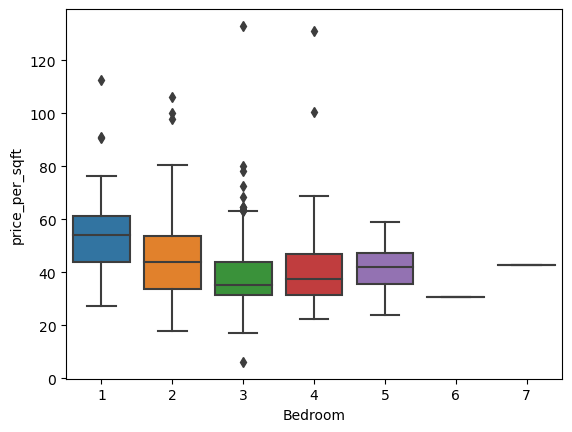

In [11]:
sns.boxplot(data = rent_df, x = 'Bedroom', y = 'price_per_sqft');

<AxesSubplot:>

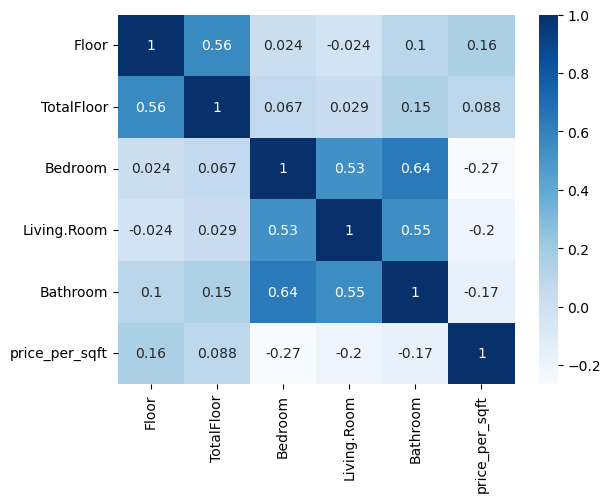

In [12]:
sns.heatmap(rent_df[['Floor','TotalFloor','Bedroom','Living.Room','Bathroom','price_per_sqft']].corr(),annot=True,cmap='Blues')


In [13]:
rent_df.shape

(645, 9)

In [14]:
rent_df.head(2)

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,price_per_sqft
0,1,1177.698,2,7,2,2,2,62000,52.645075
1,2,2134.800,5,7,4,2,2,78000,36.537381


In [15]:
# Creating input features and target variable
X = rent_df.iloc[:,1:7]
y = rent_df.iloc[:,-2]

# printing the shapes
print('X matrix dimensionality : ', X.shape)
print('y matrix dimensionality : ', y.shape)

X matrix dimensionality :  (645, 6)
y matrix dimensionality :  (645,)


In [16]:
print(X.keys())

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom'], dtype='object')


In [17]:
# Performing train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 8)

In [18]:
# Confirming whether train test split is performed properly or not
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(645, 6)
(645,)
(451, 6)
(194, 6)
(451,)
(194,)


In [19]:
# the minimum RMSE returns the optimum value of K
rmse_val = []
for K in range(1,20):
    model = KNeighborsRegressor(n_neighbors = K) # use the model
    model.fit(X_train,y_train) # fit the model 
    pred = model.predict(X_test) # predict the model
    error = np.sqrt(mean_squared_error(y_test, pred)) # get error
    rmse_val.append(error) # store in list for further usage/plotting
    print('RMSE value for k = ', K, 'is : ', error) # check error vs K

RMSE value for k =  1 is :  19304.416508856793
RMSE value for k =  2 is :  17150.22077320253
RMSE value for k =  3 is :  16475.994162757
RMSE value for k =  4 is :  16344.19507849356
RMSE value for k =  5 is :  16582.035611567688
RMSE value for k =  6 is :  16661.006261534963
RMSE value for k =  7 is :  16756.97540491461
RMSE value for k =  8 is :  17111.13745709584
RMSE value for k =  9 is :  16909.90034209012
RMSE value for k =  10 is :  16997.133571318347
RMSE value for k =  11 is :  16993.615613534363
RMSE value for k =  12 is :  16987.792507020975
RMSE value for k =  13 is :  16868.403673914454
RMSE value for k =  14 is :  16768.979792239552
RMSE value for k =  15 is :  16993.45962415273
RMSE value for k =  16 is :  16935.33879302722
RMSE value for k =  17 is :  16915.74088080069
RMSE value for k =  18 is :  16994.315984371016
RMSE value for k =  19 is :  17071.982462689724


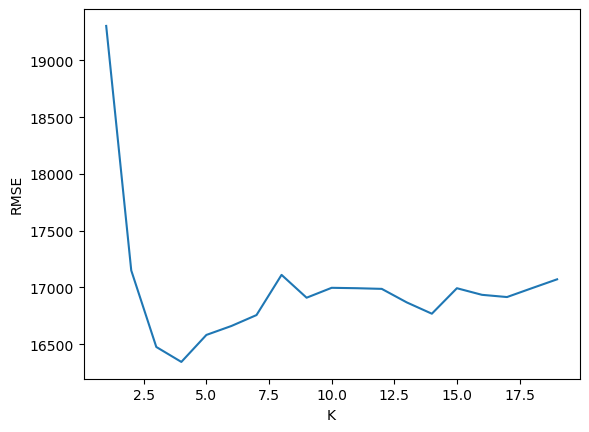

In [20]:
# Plot
k_range = range(1,20)
plt.plot(k_range, rmse_val)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

In [21]:
# the maximum R2_score returns the optimum value of K
r2_val = []
from sklearn.metrics import r2_score 
for K in range(1,20):
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    r2 = r2_score(y_test, pred)
    r2_val.append(r2)
    print('R2 value for k = ', K, 'is : ', r2)

R2 value for k =  1 is :  0.6108265329964961
R2 value for k =  2 is :  0.6928367211148728
R2 value for k =  3 is :  0.716513015909201
R2 value for k =  4 is :  0.7210303617267454
R2 value for k =  5 is :  0.7128521612762555
R2 value for k =  6 is :  0.7101106102469683
R2 value for k =  7 is :  0.7067614054886043
R2 value for k =  8 is :  0.6942351031818075
R2 value for k =  9 is :  0.7013847650795529
R2 value for k =  10 is :  0.6982958809657902
R2 value for k =  11 is :  0.6984207576116674
R2 value for k =  12 is :  0.6986274031201141
R2 value for k =  13 is :  0.7028485623500632
R2 value for k =  14 is :  0.706341113584235
R2 value for k =  15 is :  0.6984262941548837
R2 value for k =  16 is :  0.7004856441371416
R2 value for k =  17 is :  0.7011784510270609
R2 value for k =  18 is :  0.698395898668916
R2 value for k =  19 is :  0.6956328506995486


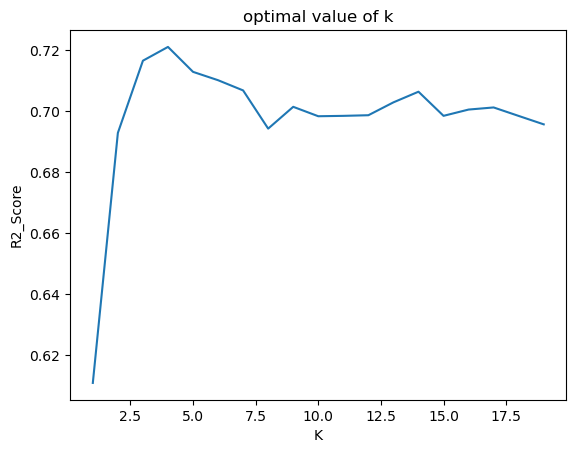

In [22]:
# Plot # 2 for R2_score
k_range = range(1,20)
plt.plot(k_range, r2_val)
plt.xlabel('K')
plt.ylabel('R2_Score')
plt.title("optimal value of k")
plt.show()

In [23]:
# From the above computation, optimum value of K is 4
# Creating the Prediction Model as below

model = KNeighborsRegressor(n_neighbors = 4) 


# fitting the model 
model.fit(X_train,y_train)

# predicting from the model
y_pred = model.predict(X_test)

# RMSE and R2_score
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2_Score:",r2_score(y_test, y_pred))

RMSE: 16344.19507849356
R2_Score: 0.7210303617267454
